In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Final_translated.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,translated_review_comment_message
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,I received well before the deadline.
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Congratulations Lannister Stores I loved buyin...
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,Efficient apparatus.On the site the brand of t...
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,"But a little, crashing ... for the value is good."
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,"Reliable seller, product OK and delivery befor..."


In [3]:
anew = pd.read_csv('ANEW.csv')
anew.head()

,Word,valence,arousal,dominance
0,aardvark,6.26,2.41,4.27
1,abalone,5.30,2.65,4.95
2,abandon,2.84,3.73,3.32
3,abandonment,2.63,4.95,2.64
4,abbey,5.85,2.20,5.00


In [4]:
df['year'] = pd.to_datetime(df['review_creation_date']).dt.year
df['year'].value_counts()

2018    22925
2017    17814
2016      238
Name: year, dtype: int64

In [5]:
#Build Anew Dictionary

d = {}
for i, row in anew.iterrows():
    d[row['Word']] = row['valence']
anew = d
anew

{'aardvark': 6.26,
 'abalone': 5.3,
 'abandon': 2.84,
 'abandonment': 2.63,
 'abbey': 5.85,
 'abdomen': 5.43,
 'abdominal': 4.48,
 'abduct': 2.42,
 'abduction': 2.05,
 'abide': 5.52,
 'abiding': 5.57,
 'ability': 7.0,
 'abject': 4.0,
 'ablaze': 5.15,
 'able': 6.64,
 'abnormal': 3.53,
 'abnormality': 3.05,
 'abode': 5.28,
 'abolish': 3.84,
 'abominable': 4.05,
 'abomination': 2.5,
 'abort': 3.1,
 'abortion': 2.58,
 'abracadabra': 5.11,
 'abrasive': 4.26,
 'abreast': 4.62,
 'abrupt': 3.28,
 'abscess': 2.79,
 'absence': 3.86,
 'absent': 4.1,
 'absinthe': 3.53,
 'absolute': 5.43,
 'absolution': 6.58,
 'absolve': 4.58,
 'absorb': 5.5,
 'abstain': 4.4,
 'abstinence': 3.43,
 'abstract': 5.25,
 'absurd': 4.45,
 'absurdity': 4.06,
 'abundance': 6.67,
 'abundant': 7.55,
 'abuse': 1.53,
 'abusive': 2.05,
 'abysmal': 3.45,
 'abyss': 3.9,
 'academic': 6.61,
 'academy': 5.32,
 'accelerant': 4.59,
 'accelerate': 6.1,
 'accelerated': 6.21,
 'acceleration': 6.19,
 'accelerator': 5.63,
 'accent': 6.48,


In [6]:
#Split df based on year
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]
df_2018 = df[df['year'] == 2018]

In [7]:
def get_frequency_anew(df):
    total_words=0
    counter={}
    for idx,row in df.iterrows():
        words=str(row['translated_review_comment_message']).split()
        for word in words:
            if word in anew:
                total_words+=1
                if word not in counter:
                    counter[word]=1
                else:
                    counter[word]+=1
    return (counter,total_words)

In [8]:
def get_proportion_anew(counter,total_words):
        return {key:val/total_words for key,val in counter.items()}

In [9]:
def get_avg_happiness(counter,total_words):
    avg_happiness=0
    for key,val in counter.items():
        avg_happiness+=val*anew[key]
    
    avg_happiness/=total_words
    
    return avg_happiness

In [10]:
counter_2016,total_words_2016=get_frequency_anew(df_2016)
counter_2017,total_words_2017=get_frequency_anew(df_2017)
counter_2018,total_words_2018=get_frequency_anew(df_2018)

In [11]:
p_2016=get_proportion_anew(counter_2016,total_words_2016)
p_2017=get_proportion_anew(counter_2017,total_words_2017)
p_2018=get_proportion_anew(counter_2018,total_words_2018)

In [12]:
avg_2016=get_avg_happiness(counter_2016,total_words_2016)
avg_2017=get_avg_happiness(counter_2017,total_words_2017)
avg_2018=get_avg_happiness(counter_2018,total_words_2018)

### Average Happiness 2016-2018

Text(0.5, 0, 'Year')

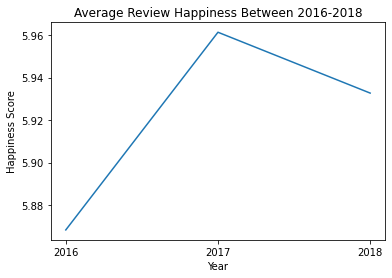

In [13]:
import matplotlib.pyplot as plt
happiness=[avg_2016,avg_2017,avg_2018]
year=['2016','2017','2018']
plt.plot(year,happiness)
plt.title('Average Review Happiness Between 2016-2018')
plt.ylabel('Happiness Score')
plt.xlabel('Year')

### 2017 Vs 2018 Happiness Analysis

In [14]:
#Filter out words so only words in both years are kept
common_keys = set(p_2018.keys()).intersection(set(p_2017.keys()))
filtered_p_2017 = {k: p_2017[k] for k in common_keys}
filtered_p_2018 = {k: p_2018[k] for k in common_keys}


In [15]:
#Get valence score of each words in 2018 reviews (filtered)
filtered_happy_2018_anew={k: anew[k] for k in filtered_p_2018.keys()}

In [16]:
df_2017_and_2018=pd.DataFrame({
    'word_2017':filtered_p_2017.keys(),
    'p_2017':filtered_p_2017.values(),
    'word_2018':filtered_p_2018.keys(),
    'p_2018':filtered_p_2018.values(),
    'Valence_2018':filtered_happy_2018_anew.values()
})

df_2017_and_2018.head()

,word_2017,p_2017,word_2018,p_2018,Valence_2018
0,exist,0.000022,exist,0.000049,5.90
1,grow,0.000022,grow,0.000016,6.28
2,laptop,0.000087,laptop,0.000033,6.95
3,solve,0.000800,solve,0.001352,6.30
4,notice,0.000130,notice,0.000163,5.94


In [17]:
df_2017_and_2018['Happy Difference']=df_2017_and_2018['Valence_2018']-avg_2017
df_2017_and_2018['Proportion Difference']=df_2017_and_2018['p_2018']-df_2017_and_2018['p_2017']
df_2017_and_2018['delta']=100/abs(avg_2018-avg_2017)*(df_2017_and_2018['Valence_2018']-avg_2017)*(df_2017_and_2018['p_2018']-df_2017_and_2018['p_2017'])

In [18]:
df_2017_and_2018=df_2017_and_2018.loc[df_2017_and_2018['delta'].abs().sort_values(ascending=False).index]

In [19]:
df_2017_and_2018[:20]

,word_2017,p_2017,word_2018,p_2018,Valence_2018,Happy Difference,Proportion Difference,delta
109,good,0.031516,good,0.028389,7.89,1.928694,-0.003127,-21.074117
466,deadline,0.017607,deadline,0.016092,3.19,-2.771306,-0.001515,14.674880
475,loved,0.015012,loved,0.012949,7.65,1.688694,-0.002063,-12.175037
1138,great,0.012481,great,0.010717,7.50,1.538694,-0.001764,-9.483681
1202,excellent,0.008674,excellent,0.007280,7.56,1.598694,-0.001393,-7.784539
581,wrong,0.002898,wrong,0.003697,3.24,-2.721306,0.000799,-7.596305
1609,delay,0.002185,delay,0.003029,3.45,-2.511306,0.000845,-7.414003
627,recommend,0.036534,recommend,0.033308,6.52,0.558694,-0.003226,-6.298852
597,buy,0.012481,buy,0.010440,6.82,0.858694,-0.002041,-6.123426
1203,late,0.000454,late,0.001108,3.32,-2.641306,0.000653,-6.030357


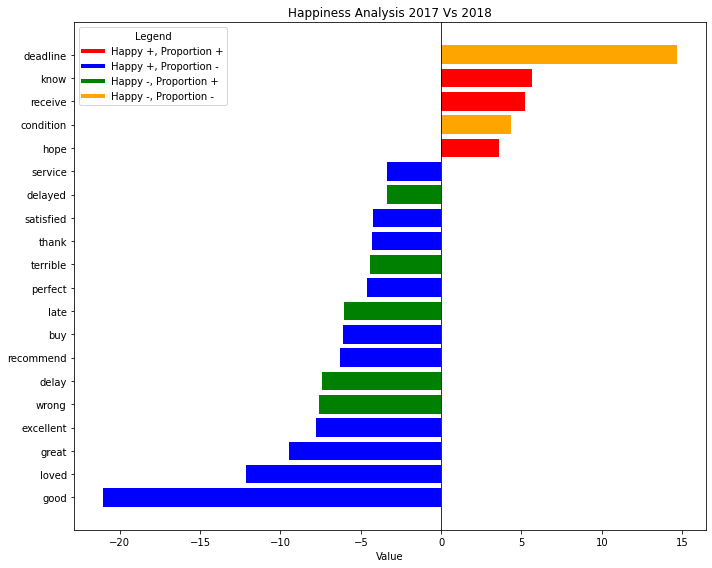

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = df_2017_and_2018[:20][::-1]

# Define conditions for color coding
def get_color(row):
    if row['Happy Difference'] > 0 and row['Proportion Difference'] > 0:
        return 'red'      # Both positive
    elif row['Happy Difference'] > 0 and row['Proportion Difference'] < 0:
        return 'blue'     # Happy positive, Proportion negative
    elif row['Happy Difference'] < 0 and row['Proportion Difference'] > 0:
        return 'green'    # Happy negative, Proportion positive
    else:
        return 'orange'   # Both negative

# Apply the color coding to each row
df['color'] = df.apply(get_color, axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Negative delta to the left, positive delta to the right
df_sorted = df.sort_values('delta', ascending=True)
bar_colors = df_sorted['color']

# Plot bars
ax.barh(df_sorted['word_2017'], df_sorted['delta'], color=bar_colors)

# Add a vertical line at the center
ax.axvline(0, color='black', linewidth=0.8)

# Set labels and title
ax.set_xlabel('Value')
ax.set_title('Happiness Analysis 2017 Vs 2018')

# Create a custom legend
color_mapping = {
    'red': 'Happy +, Proportion +',
    'blue': 'Happy +, Proportion -',
    'green': 'Happy -, Proportion +',
    'orange': 'Happy -, Proportion -'
}
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in color_mapping]
labels = list(color_mapping.values())
ax.legend(handles, labels, title='Legend')

plt.tight_layout()
plt.show()

### 2016 Vs 2017 Happiness Analysis

In [21]:
#Filter out words so only words in both years are kept
common_keys = set(p_2017.keys()).intersection(set(p_2016.keys()))
filtered_p_2016 = {k: p_2016[k] for k in common_keys}
filtered_p_2017 = {k: p_2017[k] for k in common_keys}

In [22]:
#Get valence score of each words in 2017 reviews (filtered)
filtered_happy_2017_anew={k: anew[k] for k in filtered_p_2017.keys()}

In [23]:
df_2016_and_2017=pd.DataFrame({
    'word_2016':filtered_p_2016.keys(),
    'p_2016':filtered_p_2016.values(),
    'word_2017':filtered_p_2017.keys(),
    'p_2017':filtered_p_2017.values(),
    'Valence_2017':filtered_happy_2017_anew.values()
})

df_2016_and_2017.head()

,word_2016,p_2016,word_2017,p_2017,Valence_2017
0,say,0.001192,say,0.001319,5.91
1,period,0.001192,period,0.000779,3.33
2,sell,0.002384,sell,0.000346,5.33
3,surprised,0.001192,surprised,0.000973,6.57
4,opening,0.001192,opening,0.000130,5.95


In [24]:
df_2016_and_2017['Happy Difference']=df_2016_and_2017['Valence_2017']-avg_2016
df_2016_and_2017['Proportion Difference']=df_2016_and_2017['p_2017']-df_2016_and_2017['p_2016']
df_2016_and_2017['delta']=100/abs(avg_2017-avg_2016)*(df_2016_and_2017['Valence_2017']-avg_2016)*(df_2016_and_2017['p_2017']-df_2016_and_2017['p_2016'])

In [25]:
df_2016_and_2017=df_2016_and_2017.loc[df_2016_and_2017['delta'].abs().sort_values(ascending=False).index]

In [26]:
df_2016_and_2017[:20]

,word_2016,p_2016,word_2017,p_2017,Valence_2017,Happy Difference,Proportion Difference,delta
42,good,0.015495,good,0.031516,7.89,2.021657,0.016021,34.840812
153,loved,0.005959,loved,0.015012,7.65,1.781657,0.009052,17.348587
182,quality,0.007151,quality,0.016266,6.86,0.991657,0.009115,9.722949
138,free,0.003576,free,0.000433,8.25,2.381657,-0.003143,-8.052390
110,beautiful,0.002384,beautiful,0.006532,7.61,1.741657,0.004149,7.772441
265,expensive,0.003576,expensive,0.000952,3.36,-2.508343,-0.002624,7.079983
94,like,0.007151,like,0.011291,7.44,1.571657,0.004140,6.998793
209,unable,0.002384,unable,0.000216,2.96,-2.908343,-0.002167,6.780983
246,receive,0.016687,receive,0.011767,7.14,1.271657,-0.004920,-6.729532
121,deadline,0.015495,deadline,0.017607,3.19,-2.678343,0.002113,-6.086585


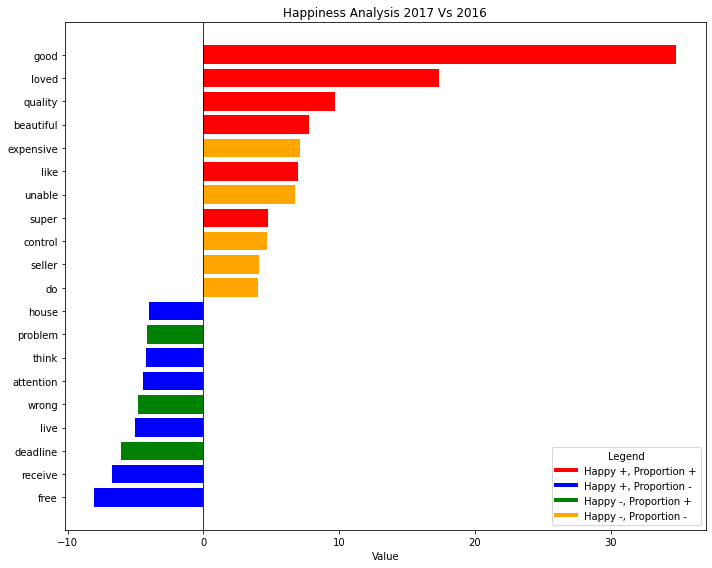

In [27]:
df = df_2016_and_2017[:20][::-1]

# Define conditions for color coding
def get_color(row):
    if row['Happy Difference'] > 0 and row['Proportion Difference'] > 0:
        return 'red'      # Both positive
    elif row['Happy Difference'] > 0 and row['Proportion Difference'] < 0:
        return 'blue'     # Happy positive, Proportion negative
    elif row['Happy Difference'] < 0 and row['Proportion Difference'] > 0:
        return 'green'    # Happy negative, Proportion positive
    else:
        return 'orange'   # Both negative

# Apply the color coding to each row
df['color'] = df.apply(get_color, axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Negative delta to the left, positive delta to the right
df_sorted = df.sort_values('delta', ascending=True)
bar_colors = df_sorted['color']

# Plot bars
ax.barh(df_sorted['word_2017'], df_sorted['delta'], color=bar_colors)

# Add a vertical line at the center
ax.axvline(0, color='black', linewidth=0.8)

# Set labels and title
ax.set_xlabel('Value')
ax.set_title('Happiness Analysis 2017 Vs 2016')

# Create a custom legend
color_mapping = {
    'red': 'Happy +, Proportion +',
    'blue': 'Happy +, Proportion -',
    'green': 'Happy -, Proportion +',
    'orange': 'Happy -, Proportion -'
}
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in color_mapping]
labels = list(color_mapping.values())
ax.legend(handles, labels, title='Legend')

plt.tight_layout()
plt.show()